In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | namatanai
Processing Record 3 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 4 of Set 1 | great yarmouth
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | preobrazheniye
Processing Record 8 of Set 1 | moussoro
Processing Record 9 of Set 1 | bodden town
Processing Record 10 of Set 1 | arona
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | sao joao da barra
Processing Record 15 of Set 1 | arroio grande
Processing Record 16 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 1 | evensk
Processing Record 18 of Set 1 | yarmouth
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 

Processing Record 35 of Set 4 | santa marta
Processing Record 36 of Set 4 | ponta delgada
Processing Record 37 of Set 4 | kodiak
Processing Record 38 of Set 4 | otradnoye
Processing Record 39 of Set 4 | grand-santi
Processing Record 40 of Set 4 | urumqi
Processing Record 41 of Set 4 | saldanha
Processing Record 42 of Set 4 | bambous virieux
Processing Record 43 of Set 4 | anaconda
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | los llanos de aridane
Processing Record 46 of Set 4 | gamba
Processing Record 47 of Set 4 | sulangan
Processing Record 48 of Set 4 | merauke
Processing Record 49 of Set 4 | lakes entrance
Processing Record 50 of Set 4 | pochutla
Processing Record 1 of Set 5 | aromashevo
Processing Record 2 of Set 5 | marawi
Processing Record 3 of Set 5 | baykit
Processing Record 4 of Set 5 | intipuca
Processing Record 5 of Set 5 | muborak
Processing Record 6 of Set 5 | bethel
Processing Record 7 of Set 5 | port hardy
Processing Record 8 of Set 5 | kavara

Processing Record 23 of Set 8 | kysyl-syr
Processing Record 24 of Set 8 | hami
Processing Record 25 of Set 8 | doha
Processing Record 26 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 27 of Set 8 | saint george
Processing Record 28 of Set 8 | ulaanbaatar
Processing Record 29 of Set 8 | doembang nangbuat
Processing Record 30 of Set 8 | mahebourg
Processing Record 31 of Set 8 | keti bandar
Processing Record 32 of Set 8 | kupino
Processing Record 33 of Set 8 | alcantara
Processing Record 34 of Set 8 | newala
Processing Record 35 of Set 8 | praia
Processing Record 36 of Set 8 | dabat
Processing Record 37 of Set 8 | paamiut
Processing Record 38 of Set 8 | fairbanks
Processing Record 39 of Set 8 | peterlee
Processing Record 40 of Set 8 | lasa
Processing Record 41 of Set 8 | maceio
Processing Record 42 of Set 8 | sandakan
Processing Record 43 of Set 8 | visby
Processing Record 44 of Set 8 | ahipara
Processing Record 45 of Set 8 | akureyri
Processing Record 46 of Set 8 | gizo

Processing Record 9 of Set 12 | bandraboua
Processing Record 10 of Set 12 | warqla
City not found. Skipping...
Processing Record 11 of Set 12 | naze
Processing Record 12 of Set 12 | suntar
Processing Record 13 of Set 12 | manaia
Processing Record 14 of Set 12 | corinto
Processing Record 15 of Set 12 | huitzuco
City not found. Skipping...
Processing Record 16 of Set 12 | sevenoaks
Processing Record 17 of Set 12 | sept-iles
Processing Record 18 of Set 12 | ayagoz
Processing Record 19 of Set 12 | skjervoy
Processing Record 20 of Set 12 | hofn
Processing Record 21 of Set 12 | abu kamal
Processing Record 22 of Set 12 | radyvyliv
Processing Record 23 of Set 12 | vestmanna
Processing Record 24 of Set 12 | sweetwater
Processing Record 25 of Set 12 | banda aceh
Processing Record 26 of Set 12 | san patricio
Processing Record 27 of Set 12 | tawkar
City not found. Skipping...
Processing Record 28 of Set 12 | jiddah
City not found. Skipping...
Processing Record 29 of Set 12 | maniitsoq
Processing R

In [9]:
len(city_data)

558

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.97,102.50,58.77,80,11,4.92,RU,2020-08-02 19:38:56
1,Namatanai,-3.67,152.43,79.07,84,25,7.36,PG,2020-08-02 19:39:35
2,Great Yarmouth,52.61,1.73,66.99,85,85,1.01,GB,2020-08-02 19:46:29
3,Barrow,71.29,-156.79,39.20,80,90,11.41,US,2020-08-02 19:38:50
4,Carnarvon,-24.87,113.63,57.20,82,7,6.93,AU,2020-08-02 19:38:44
5,Preobrazheniye,42.90,133.91,67.86,94,100,8.01,RU,2020-08-02 19:46:29
6,Moussoro,13.64,16.49,81.57,67,100,12.73,TD,2020-08-02 19:46:29
7,Bodden Town,19.28,-81.25,89.60,66,20,12.75,KY,2020-08-02 19:46:29
8,Arona,28.10,-16.68,79.00,65,0,12.75,ES,2020-08-02 19:39:06
9,Vaini,-21.20,-175.20,73.40,88,75,9.17,TO,2020-08-02 19:38:47


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2020-08-02 19:38:56,71.97,102.50,58.77,80,11,4.92
1,Namatanai,PG,2020-08-02 19:39:35,-3.67,152.43,79.07,84,25,7.36
2,Great Yarmouth,GB,2020-08-02 19:46:29,52.61,1.73,66.99,85,85,1.01
3,Barrow,US,2020-08-02 19:38:50,71.29,-156.79,39.20,80,90,11.41
4,Carnarvon,AU,2020-08-02 19:38:44,-24.87,113.63,57.20,82,7,6.93
5,Preobrazheniye,RU,2020-08-02 19:46:29,42.90,133.91,67.86,94,100,8.01
6,Moussoro,TD,2020-08-02 19:46:29,13.64,16.49,81.57,67,100,12.73
7,Bodden Town,KY,2020-08-02 19:46:29,19.28,-81.25,89.60,66,20,12.75
8,Arona,ES,2020-08-02 19:39:06,28.10,-16.68,79.00,65,0,12.75
9,Vaini,TO,2020-08-02 19:38:47,-21.20,-175.20,73.40,88,75,9.17


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/02/20'

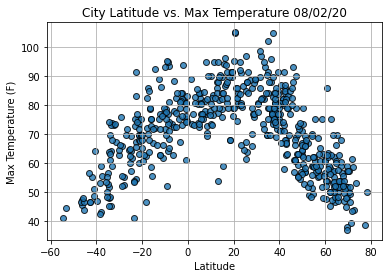

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

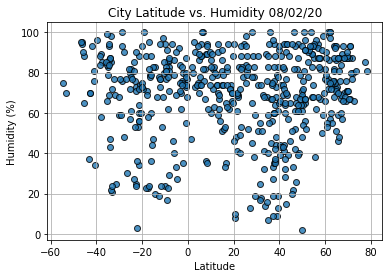

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

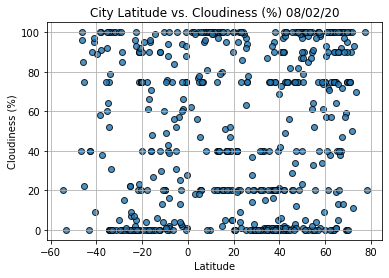

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

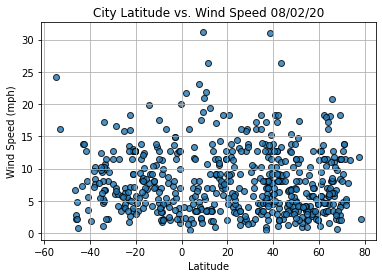

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

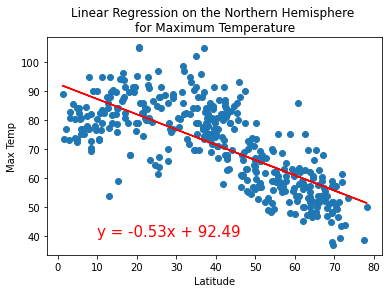

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

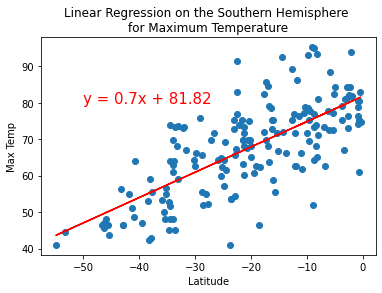

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,80))

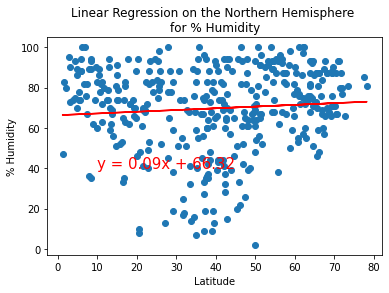

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(10,40))

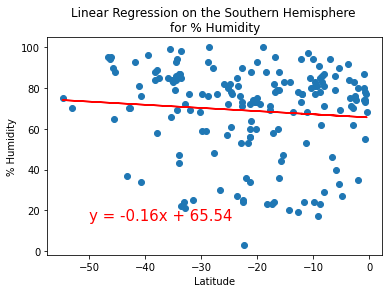

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

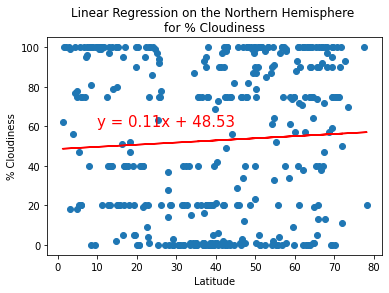

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,60))

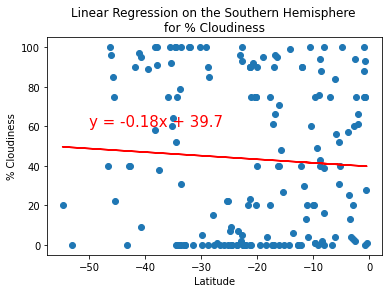

In [27]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

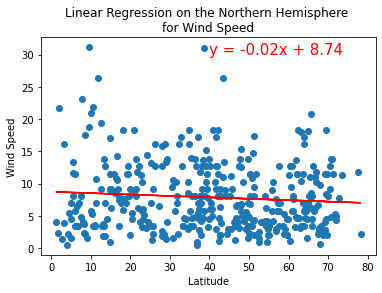

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,30))

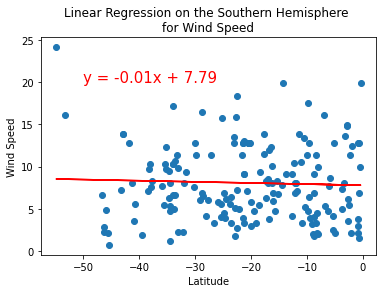

In [29]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,20))